<a href="https://colab.research.google.com/github/davidebtt/chemical_pycode/blob/solutions/Handerson_Hasselbach_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Titration of Weak Acid with Strong Base
Enter the equivalence point volume (mL): 9
Enter the pKa of the acid: 4.5
Enter the maximum volume of titrant to be added (mL): 20
Enter the concentration of the weak acid (M): 0.1
Enter the concentration of the strong base (M): 0.1


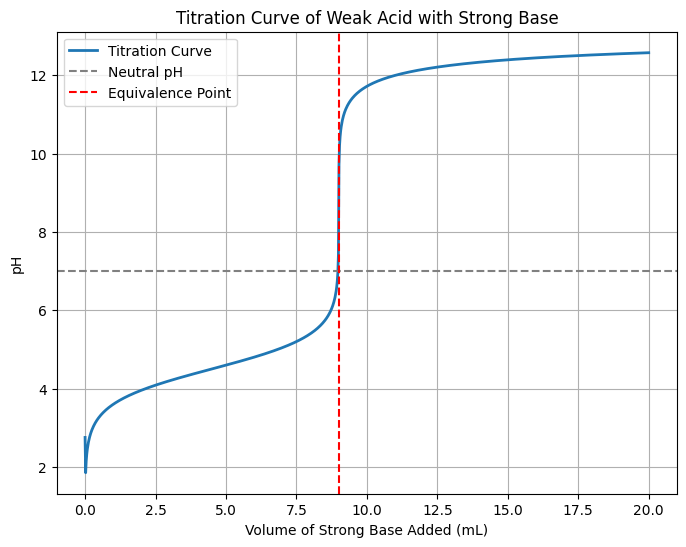

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def henderson_hasselbalch(HA, A_minus, Ka):
    if HA <= 0:
        return 14  # Avoid division errors and return basic pH
    return -np.log10(Ka) + np.log10(A_minus / HA)

def pH_titration_curve(Va, pKa, Vb_max, Cb, Ca, points=1000):
    Ka = 10**-pKa
    Vb = np.linspace(0, Vb_max, points)  # Volume of titrant added
    pH = np.zeros_like(Vb)

    for i, V in enumerate(Vb):
        if V == 0:
            H3O = np.sqrt(Ka * Ca)
            pH[i] = -np.log10(H3O)
        elif V < Va:
            HA = max((Ca * (Va - V)) / (Va + V), 1e-10)  # Avoid division by zero
            A_minus = max((Cb * V) / (Va + V), 1e-10)
            pH[i] = henderson_hasselbalch(HA, A_minus, Ka)
        elif V == Va:
            pH[i] = pKa  # At equivalence, pH equals pKa for buffering region
        else:
            OH = max((Cb * (V - Va)) / (Va + V), 1e-10)  # Prevent log(0) error
            pH[i] = 14 + np.log10(OH)

    plt.figure(figsize=(8,6))
    plt.plot(Vb, pH, label="Titration Curve", linewidth=2)
    plt.axhline(y=7, color='gray', linestyle='--', label='Neutral pH')
    plt.axvline(x=Va, color='r', linestyle='--', label='Equivalence Point')
    plt.xlabel("Volume of Strong Base Added (mL)")
    plt.ylabel("pH")
    plt.title("Titration Curve of Weak Acid with Strong Base")
    plt.legend()
    plt.grid()
    plt.show()

# User input for titration parameters
try:
    print("\nTitration of Weak Acid with Strong Base")
    Va = float(input("Enter the equivalence point volume (mL): "))
    pKa = float(input("Enter the pKa of the acid: "))
    Vb_max = float(input("Enter the maximum volume of titrant to be added (mL): "))
    Ca = float(input("Enter the concentration of the weak acid (M): "))
    Cb = float(input("Enter the concentration of the strong base (M): "))

    if Va <= 0 or pKa <= 0 or Vb_max <= 0 or Ca <= 0 or Cb <= 0:
        raise ValueError("All values must be positive numbers.")

    pH_titration_curve(Va, pKa, Vb_max, Cb, Ca)
except ValueError as e:
    print(f"Invalid input: {e}. Please enter valid numerical values.")
except KeyboardInterrupt:
    print("\nProcess interrupted by user. Exiting...")
